# info
This script takes as input metabolites log2 fold-changes.
The output is a list of dose responders and a simple heatmap for visualization purposes only.

In [1]:
import pandas, seaborn, numpy

import scipy, scipy.stats
import statsmodels, statsmodels.stats, statsmodels.stats.multitest

import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'sans-serif', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(12, 8)})

# 0. user-defined variables

In [2]:
storing_file = '/home/adrian/gd15/hi/research/huvec/results/untargeted/patient-specific/patient-specific_fold_changes.csv'

In [3]:
time_points = [4, 24]
treatments = [1, 10, 100]

In [4]:
target = 'epinephrine sulfate'
peak = 'X262.03859999999997'
condition_colors = ['tab:green', 'gold', 'tab:red', 'tab:green', 'gold', 'tab:red']
condition_labels = ['0.5 4h', '5 4h', '50 4h', '0.5 24h', '5 24h', '50 24h']

# 1. read data

In [5]:
df = pandas.read_csv(storing_file, index_col=0)
print(df.shape)
df.head()

(29, 1233)


,Patient,Time point,Treatment,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,X77.052040000000005,X77.052049999999994,X78.956580000000002,...,X970.31845999999996,X970.33735000000001,X972.28162999999995,X986.81443999999999,X996.20851000000005,X996.78913999999997,X996.80704000000003,X996.82538,X996.84303,X996.86003000000005
0,1,4,1,0.399380,0.364737,0.079219,-0.002439,0.213799,0.587217,0.167082,...,0.653499,0.391612,0.724295,-0.189454,-0.994415,-0.466579,-0.381628,-0.128967,0.006990,-0.221678
1,1,4,10,0.267059,0.537148,-0.526970,0.265058,0.250591,0.124649,-0.245610,...,1.079787,0.916029,1.193568,0.381641,-2.097145,0.132662,0.152658,0.200683,-0.336537,0.093746
2,1,4,100,0.378911,0.543563,-0.879734,0.314414,0.476670,0.370595,0.326279,...,0.791973,0.669473,0.727228,0.072475,-0.994415,0.029480,0.017771,0.169786,0.182684,-0.039107
3,1,24,1,0.045810,-0.082940,-0.317764,0.095721,0.318387,0.026868,-0.315838,...,-0.400741,-0.419110,-0.227175,-0.071420,-0.964235,-0.371348,-0.225176,-0.261598,-0.114983,0.812620
4,1,24,10,-0.085989,-0.197981,-1.207604,0.042725,0.335833,0.166158,-0.252091,...,-0.896143,-0.649981,-0.692598,-0.375253,-1.256356,0.135555,-0.047351,-0.074639,0.075210,1.039795


# 2. check on epinephrine

In [6]:
plotting_values = []

for time_point in time_points:
    for treatment in treatments:
        box = df[(df['Time point'] == time_point) & (df['Treatment'] == treatment)]['X262.03859999999997'].values
        plotting_values.append(box)

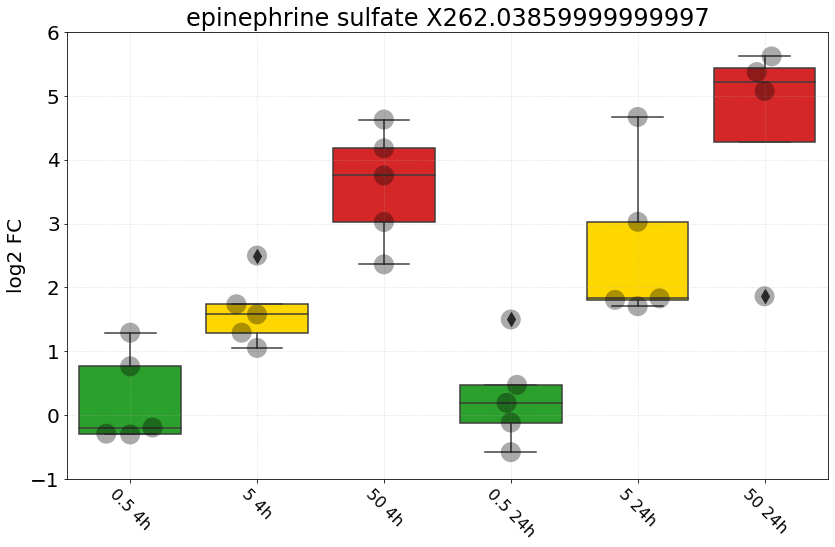

In [7]:
g = seaborn.boxplot(data=plotting_values, fliersize=10)
h = seaborn.swarmplot(data=plotting_values, color='black', alpha=1/3, s=20)

g.set(ylabel='log2 FC', title='{} {}'.format(target, peak))
for i in range(len(g.artists)):
    g.artists[i].set_facecolor(condition_colors[i])
matplotlib.pyplot.xticks(list(range(len(condition_colors))), condition_labels, fontsize=16, rotation=-45)
matplotlib.pyplot.ylim([-1, 6])
matplotlib.pyplot.grid(ls=':', alpha=0.5)
matplotlib.pyplot.tight_layout()

# 3. determine dose-responders

In [8]:
peak_names = df.columns[3:]
delta_threshold = 1
p_value_threshold = 0.05
correlations_df = pandas.DataFrame(columns=['peak name', 'log2FC', 'P value', 'r value'])

X132.02816000000001 4 -0.9403252237117765 -0.6621094730802783 0.007164219211713605


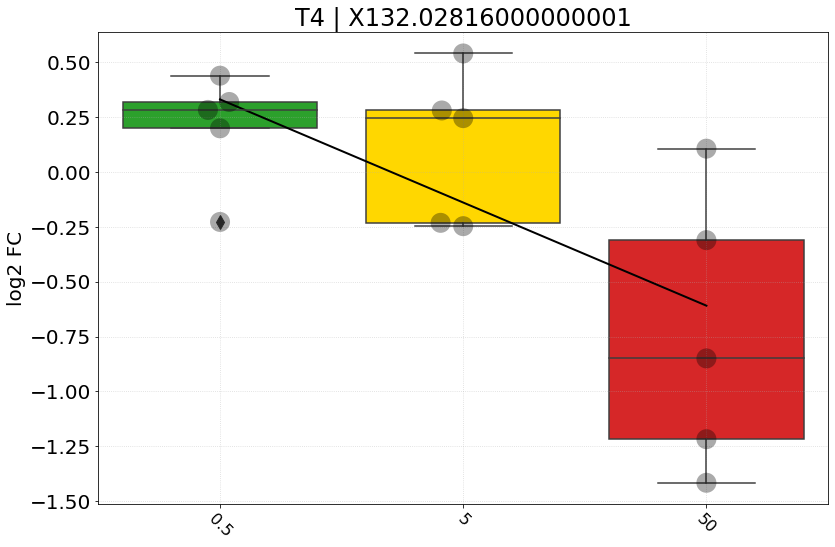

X134.89306999999999 24 1.1556255815637657 0.536886144889919 0.047750513552699984


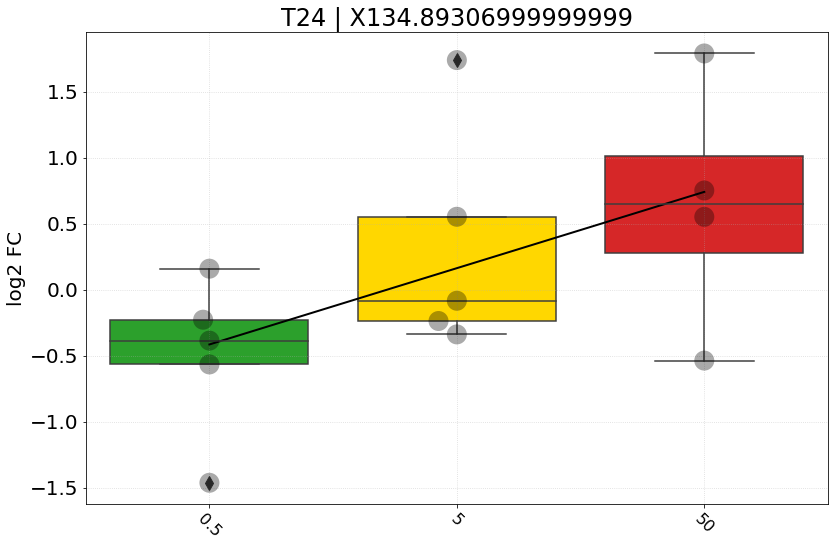

X146.08017000000001 24 -0.5868440967780917 -0.5356381910728499 0.048370499692081084


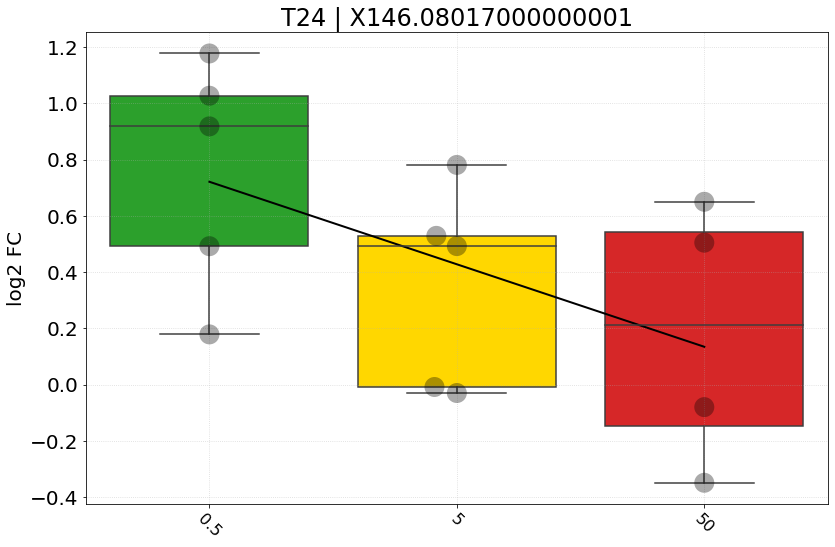

X175.02331000000001 24 2.1359546667669163 0.5752813944837053 0.03136591647069671


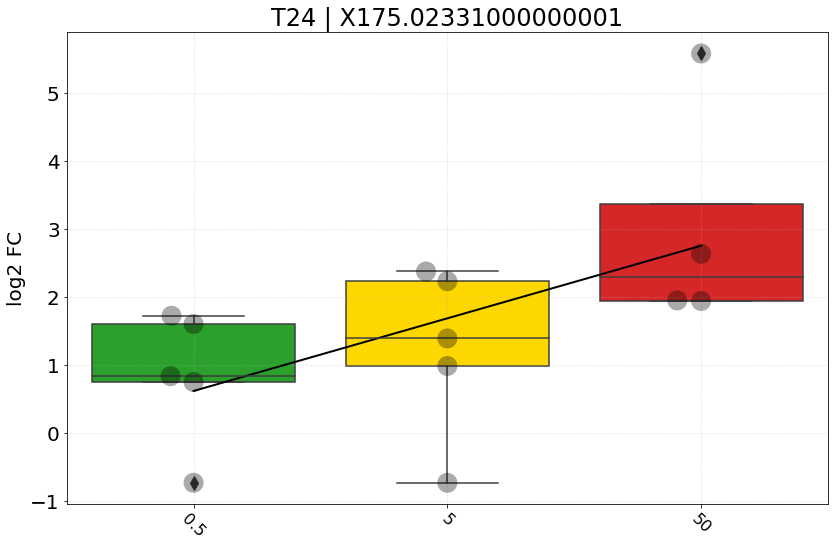

X186.04378_2 24 -0.8074397927686119 -0.6311327690748312 0.015500480009918573


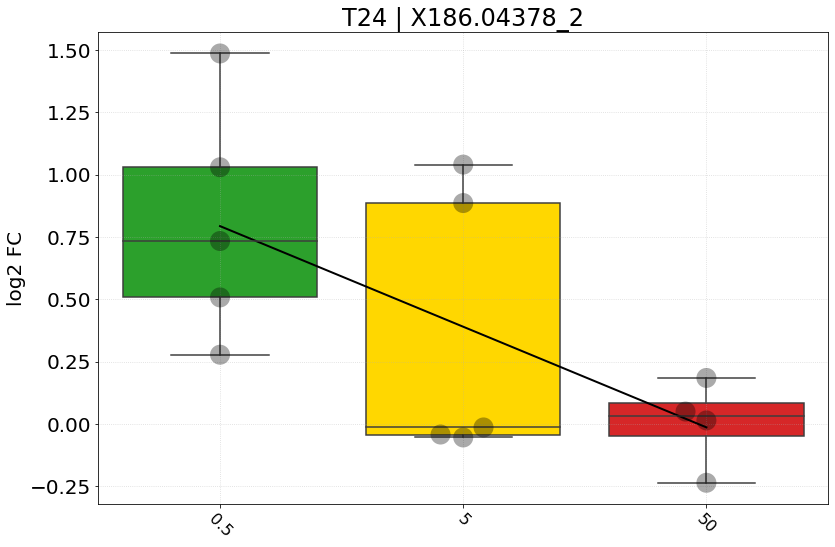

X226.08796000000001 24 -0.5572530101673694 -0.5504189578638817 0.0413940129260383


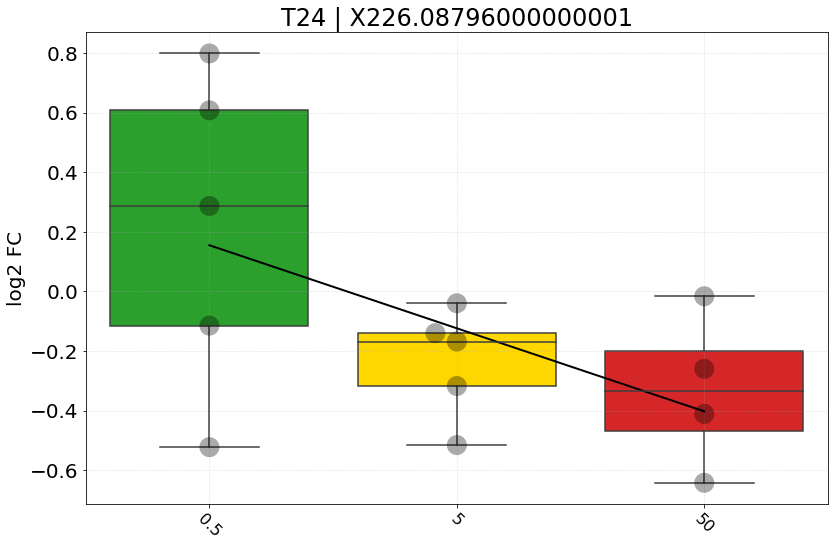

X233.15271000000001 4 0.6889169964933519 0.7085197870492995 0.0031105791500316547


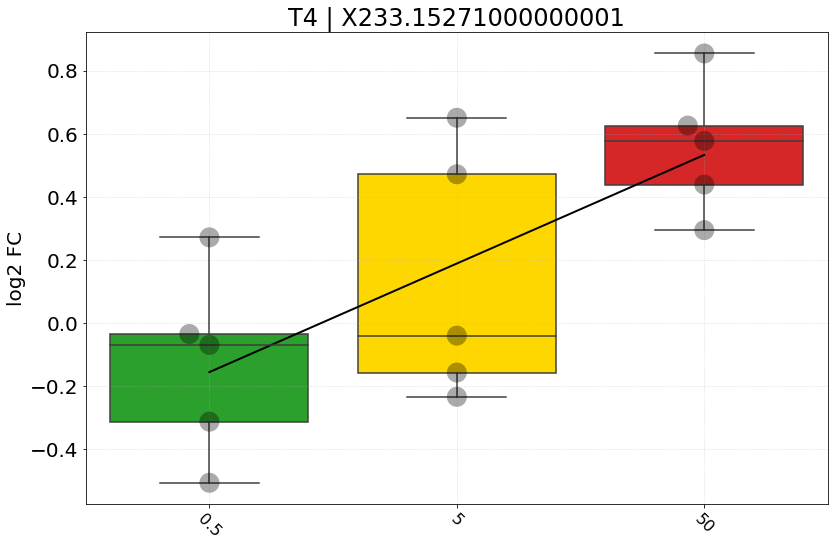

X262.03859999999997 4 3.334741293038435 0.8947962830528939 6.687943402718233e-06


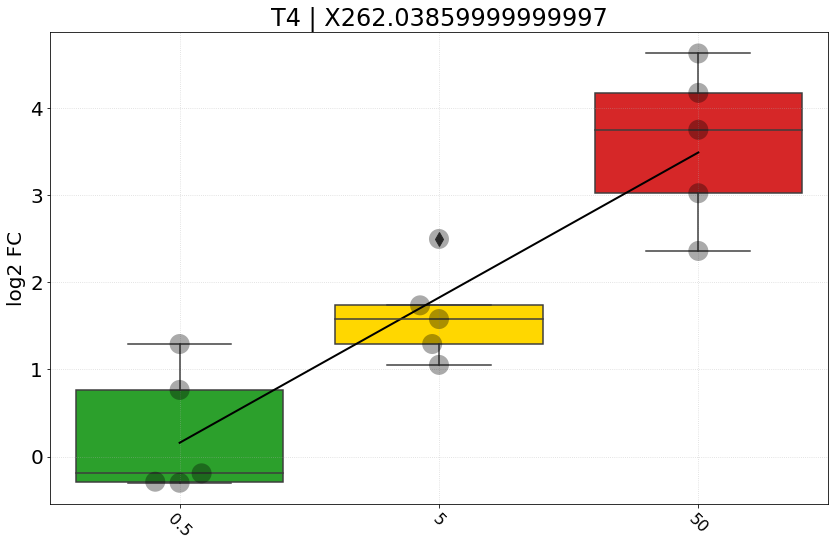

X262.03859999999997 24 4.204994159295419 0.8260628567980858 0.0002717811224507062


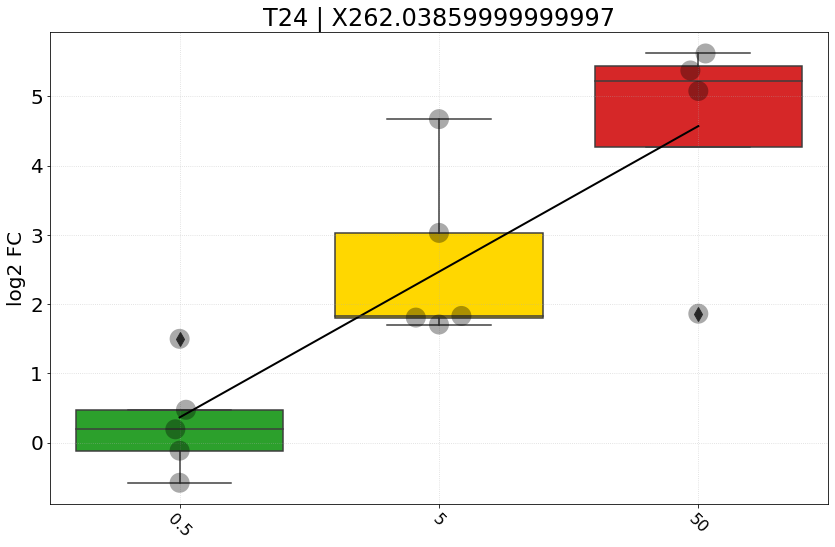

X265.01882999999998 4 0.26865963228042733 0.6458487316914225 0.009298308280077957


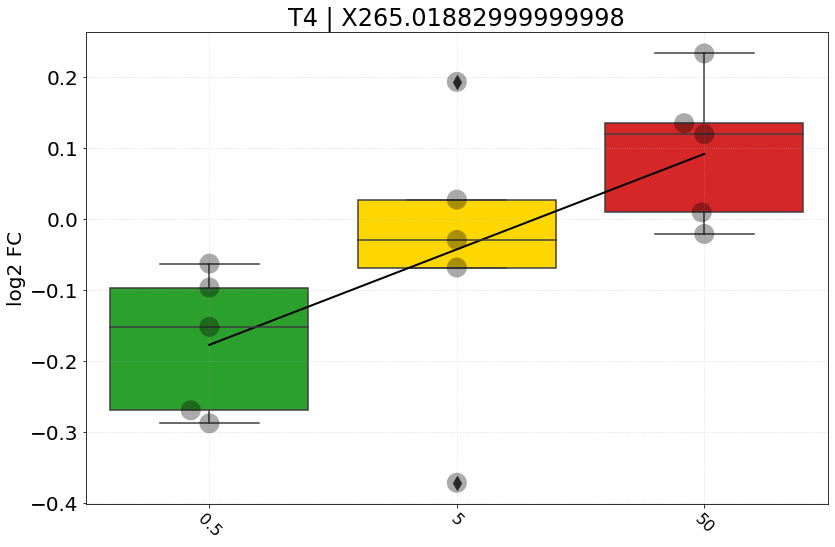

X265.14596 24 -0.3525556740338128 -0.5819322741120866 0.029020520897439162


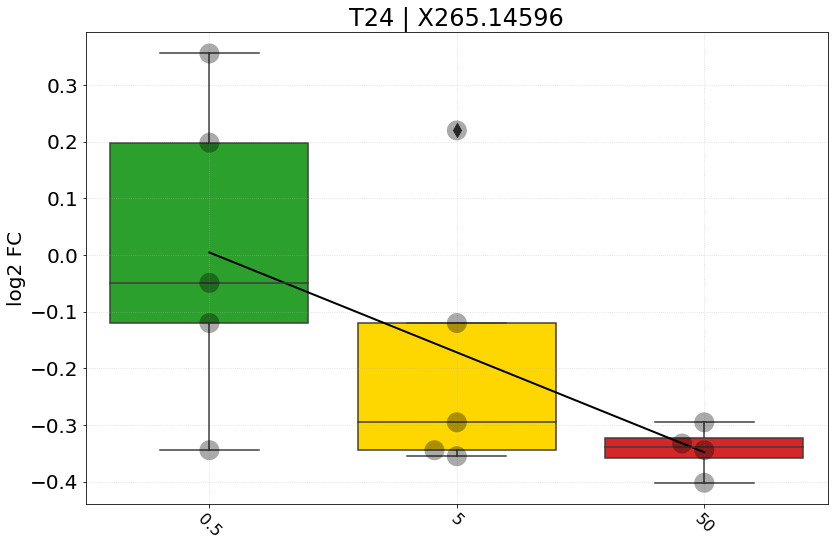

X266.14935000000003 24 -0.3646819331751964 -0.6854002804176555 0.006820412357025516


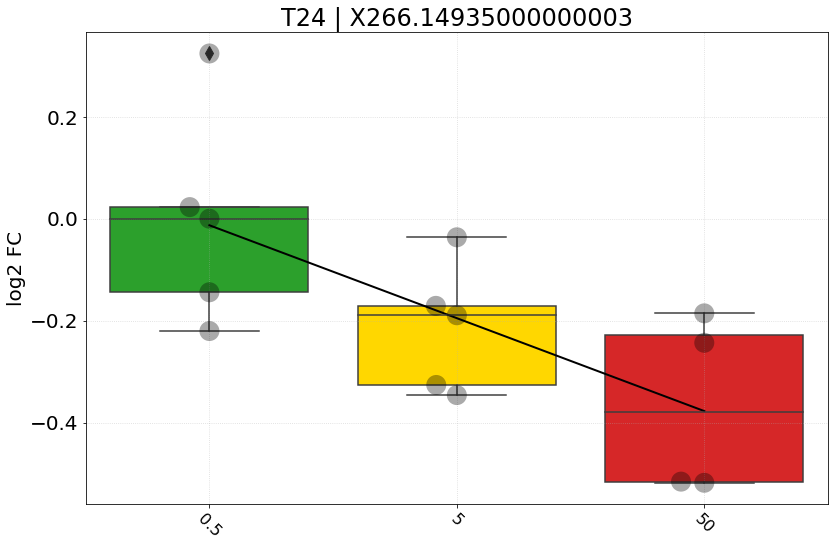

X276.05410000000001 4 3.60226187983787 0.8683950883327347 2.6834278261522637e-05


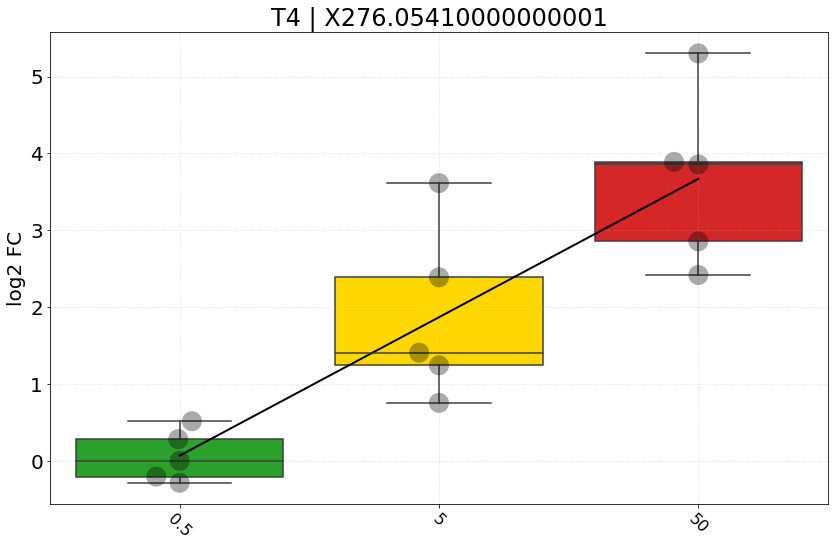

X276.05410000000001 24 3.7437005722051766 0.8307810330124302 0.00023295088160449204


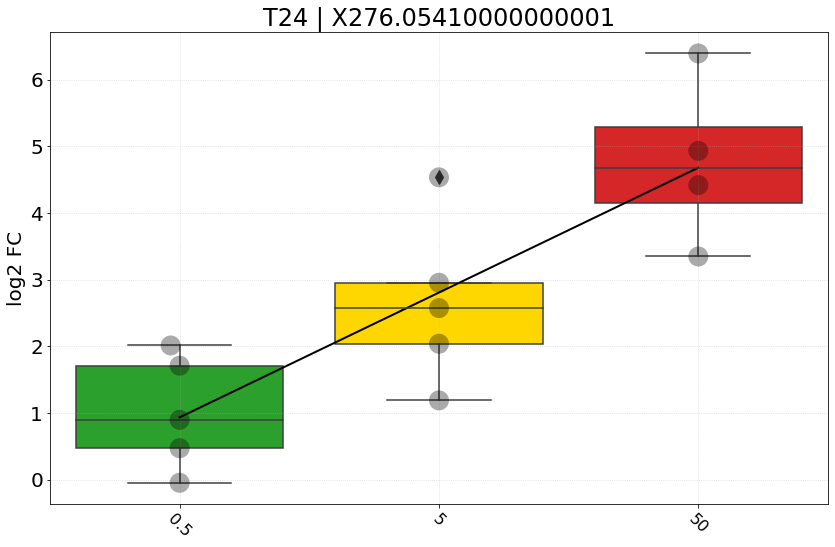

X276.05387000000002 4 3.1001526735778766 0.8436611728391533 7.721680873606367e-05


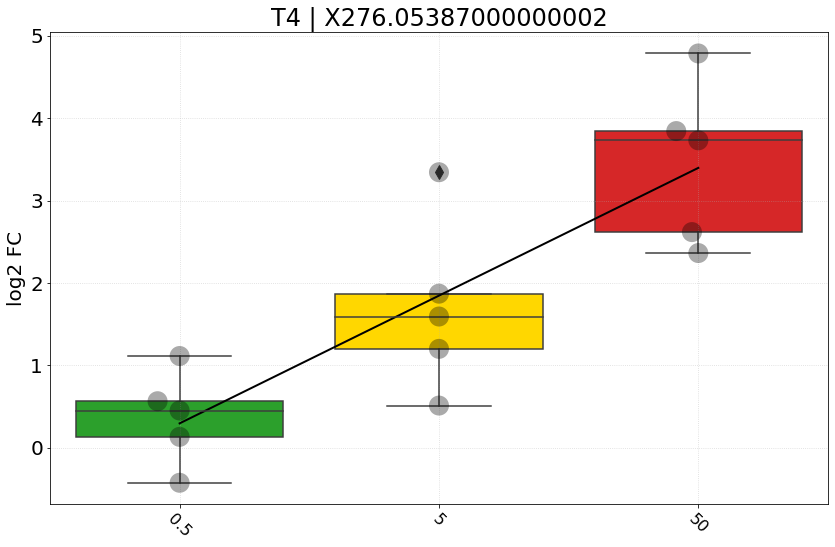

X276.05387000000002 24 4.0035824783645175 0.8506555625013948 0.00011519213537762754


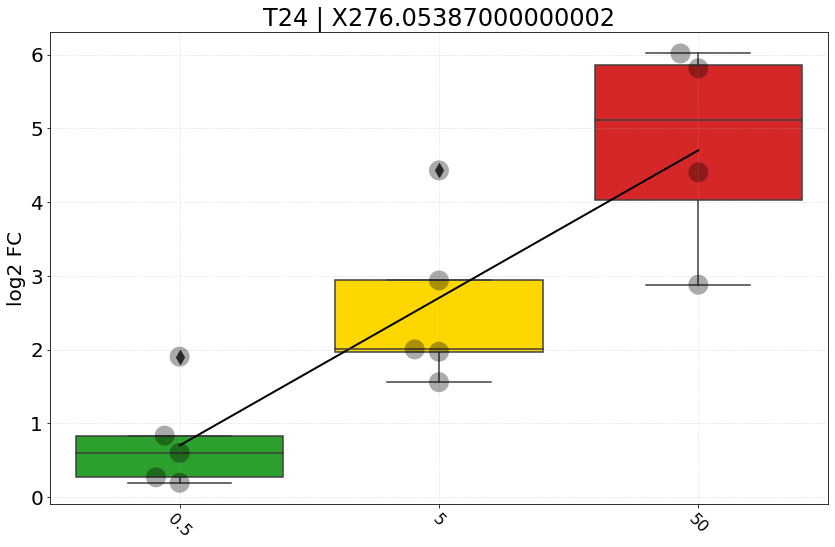

X307.15787999999998 24 0.9325213086459634 0.5543305172073889 0.03967844080158675


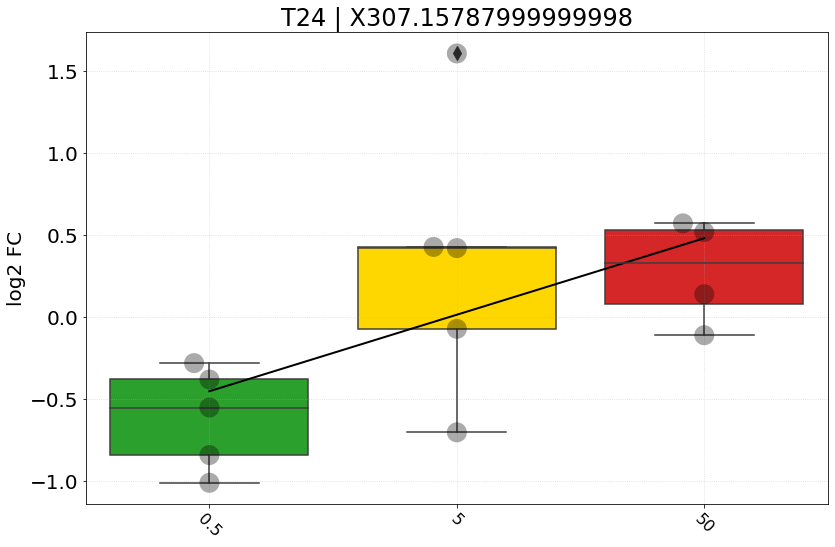

X311.16694000000001 24 -0.6096864543003226 -0.7485329398544756 0.0020706528438738858


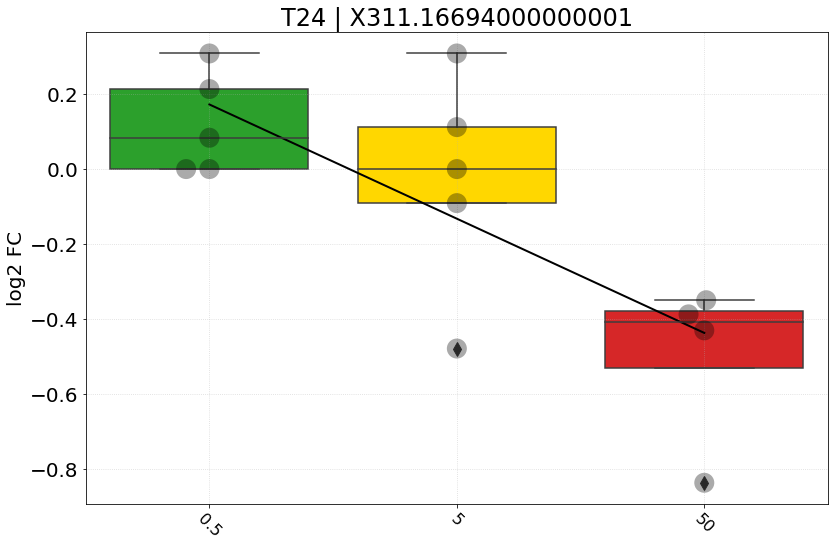

X312.17011000000002 24 -0.4225611884051509 -0.5913539502817043 0.02592508437115027


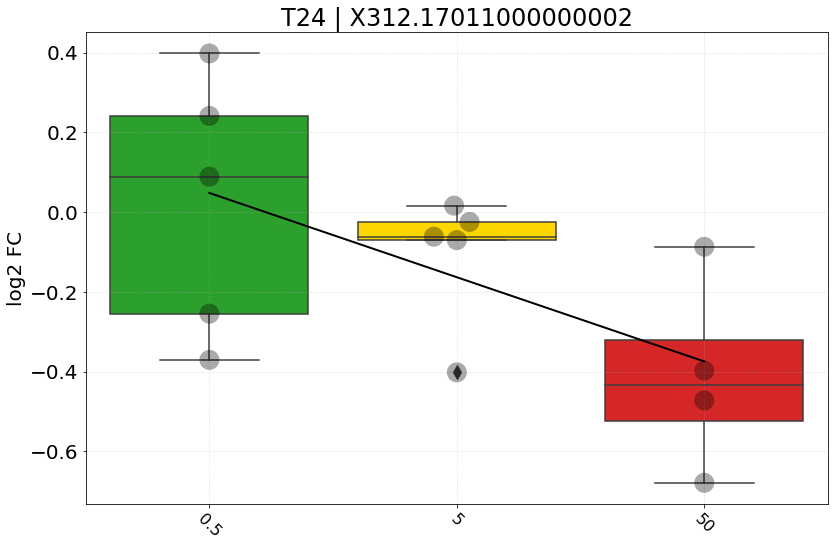

X315.00004999999999 4 0.3521408494078707 0.6356767032487088 0.010866897539061058


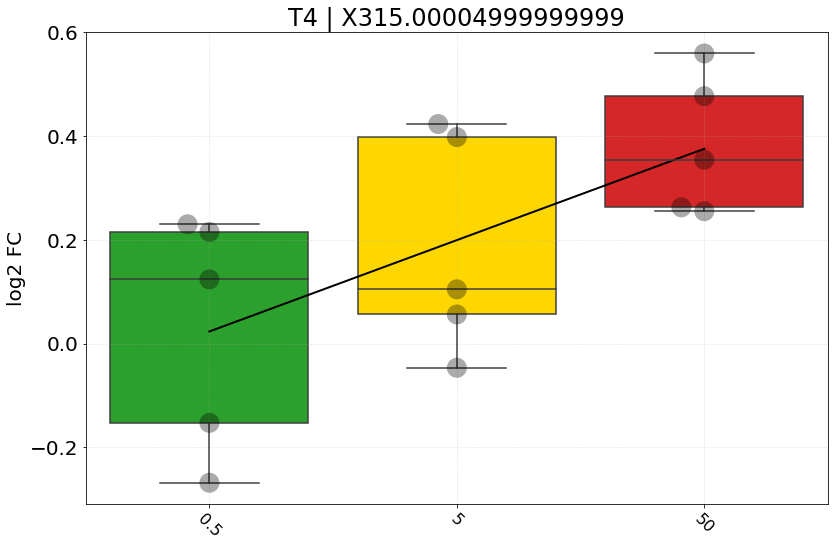

X317.95058999999998 24 0.3984880679940841 0.5340997094477015 0.04914286021494106


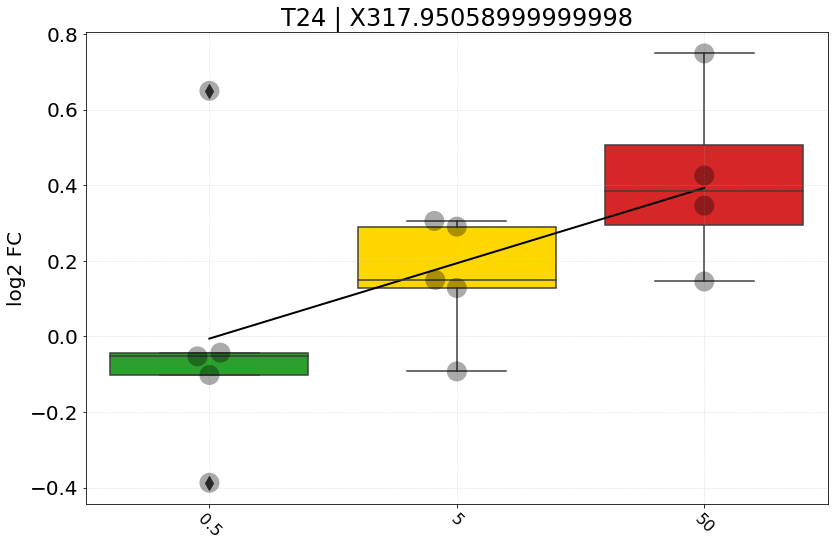

X321.17365999999998 24 1.1987428351646132 0.6202656183407328 0.01795552432215676


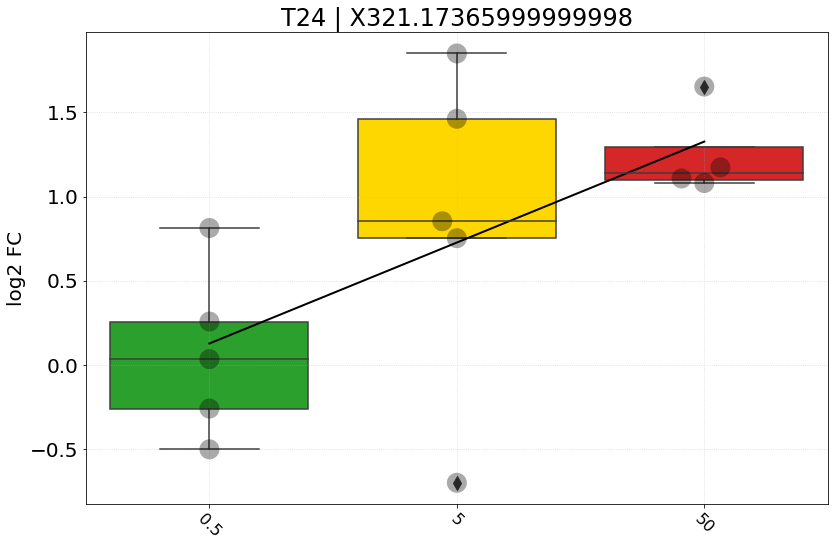

X322.17590000000001 24 1.1128433761318166 0.5917380546104669 0.025804371288259513


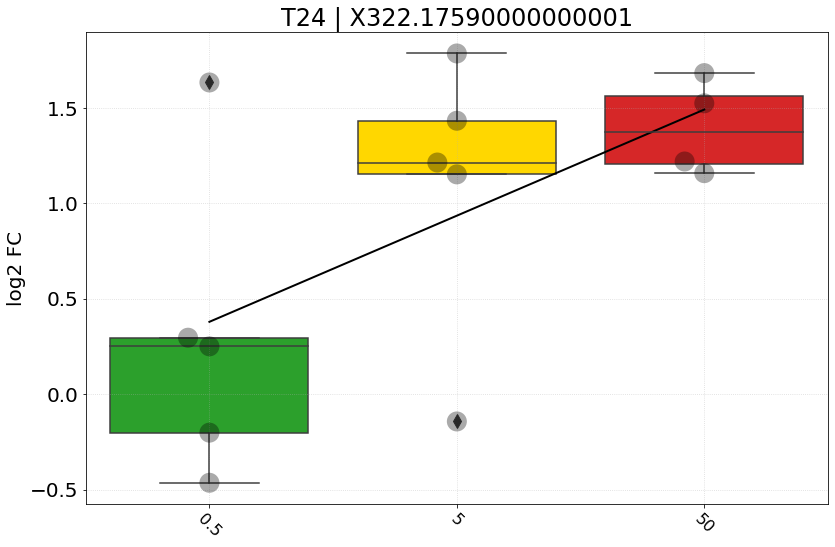

X323.16978 24 1.087833010418215 0.6870826602495234 0.006631613316440904


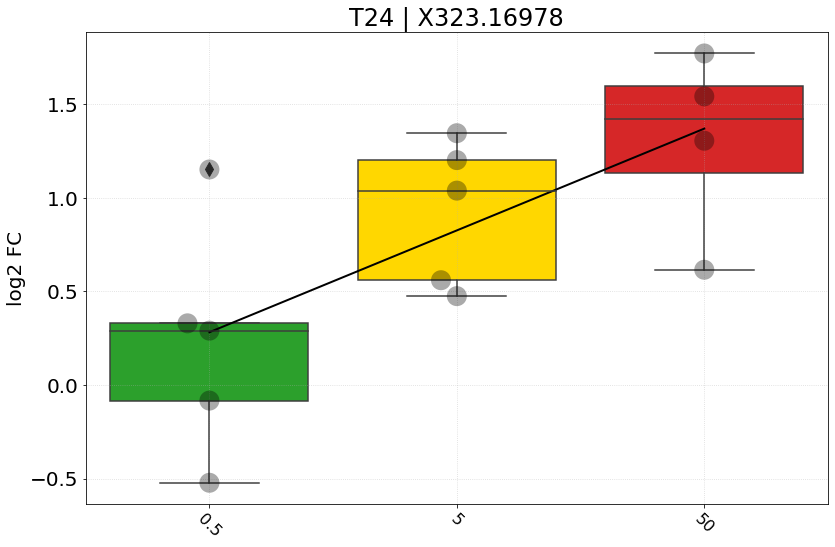

X325.18266 24 -0.6794179088453864 -0.8347726685436948 0.0002037204682910863


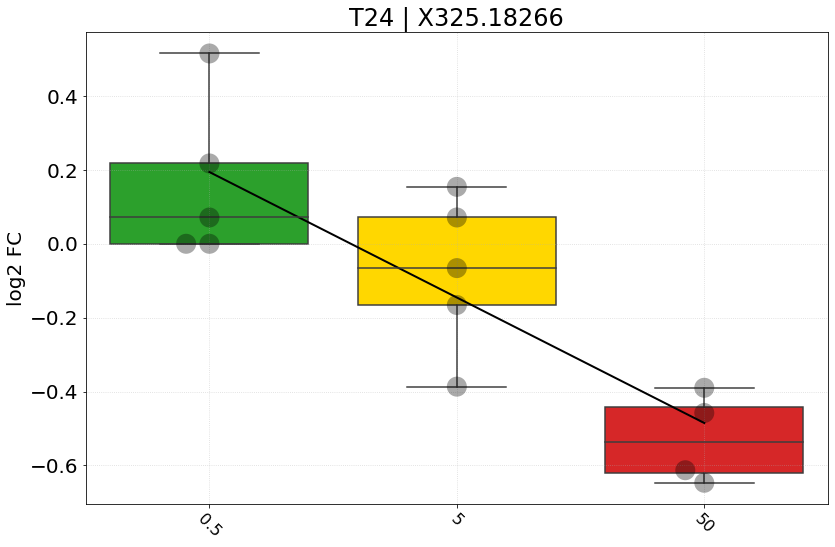

X326.18597 24 -0.48310632035742546 -0.5980242015955285 0.023888046167087368


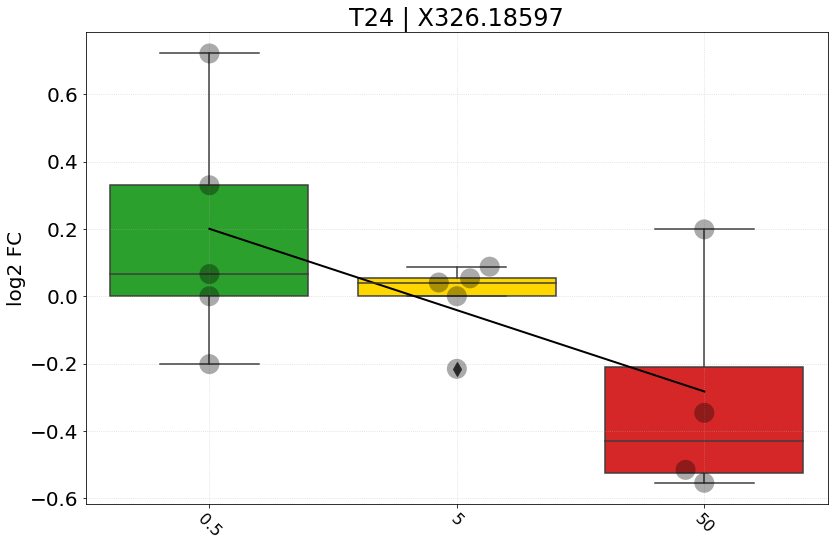

X327.18209000000002 24 -0.37947944397188116 -0.5663553283571985 0.03473142099381163


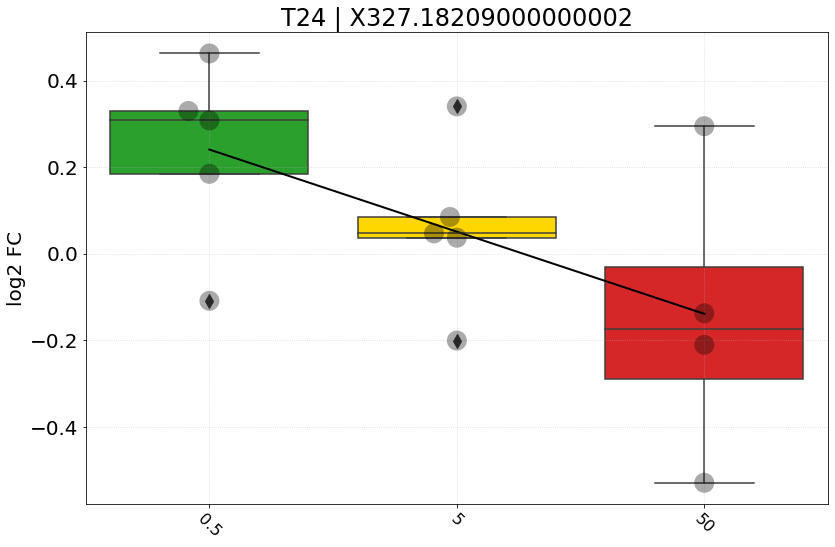

X378.2398 4 -0.857593208911206 -0.597237259047931 0.018729415518149363


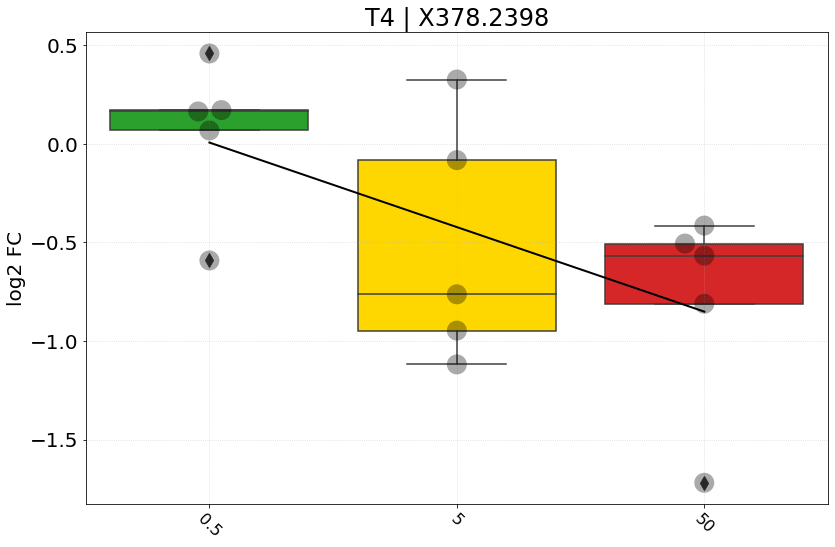

X417.21940999999998 24 0.8025027602609749 0.6447511198893471 0.012794931129641928


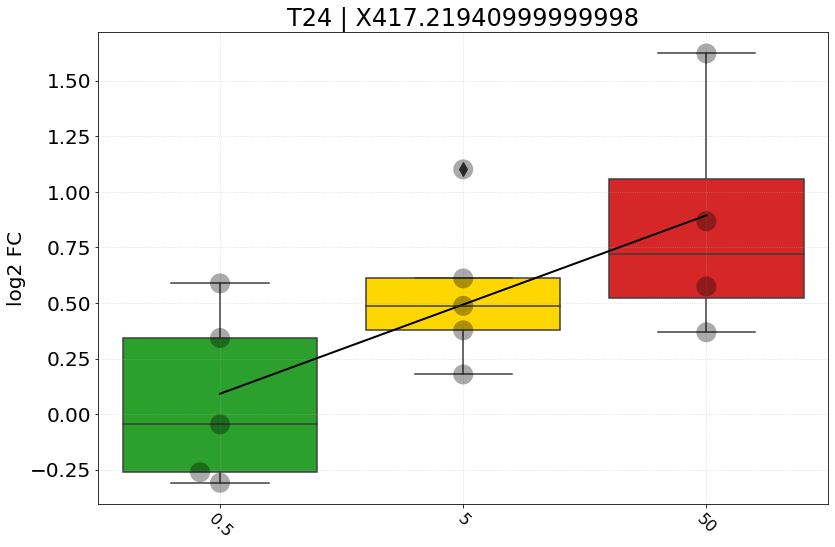

X480.30793 24 -0.8099399526115221 -0.5742977689809031 0.03172438907351164


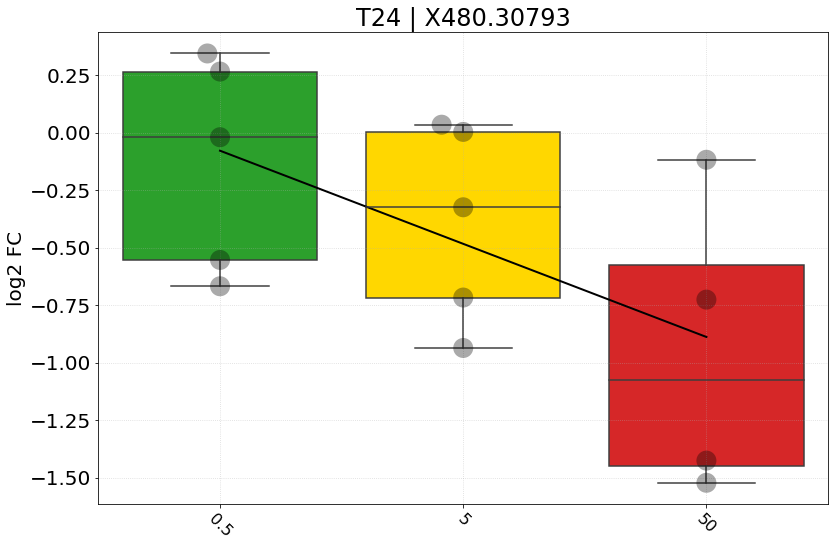

X681.29566 24 0.7897564284153276 0.5412367836501383 0.04563433554031545


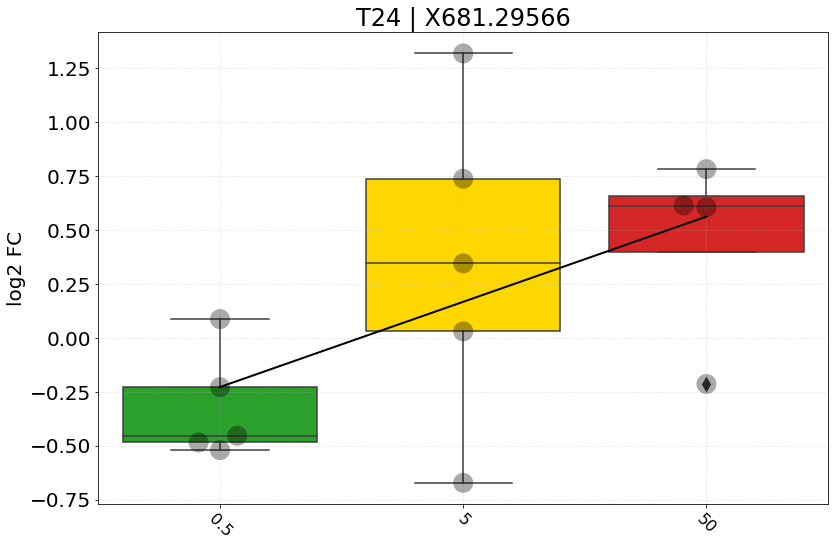

X883.51959999999997 24 -0.7202049156245132 -0.5746446967097075 0.031597609100808735


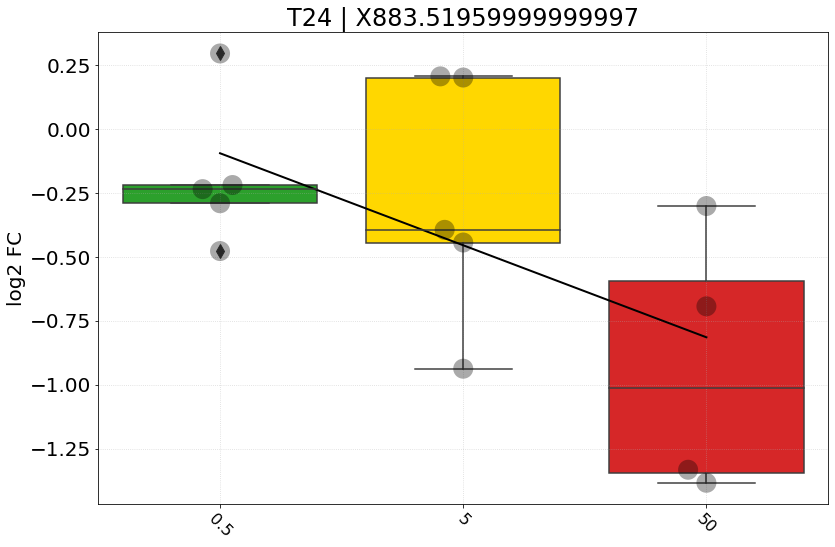

X884.55427999999995 24 -0.74642610642385 -0.5735821915387849 0.03198707999699815


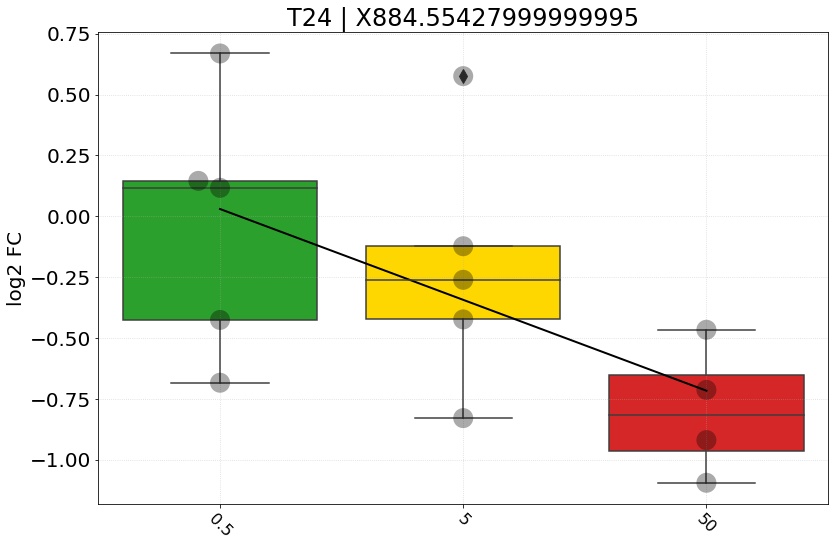

,peak name,log2FC,P value,r value,time
0,X59.01097,0.232115,0.226418,0.332179,4.0
1,X59.01097,0.040103,0.842252,0.058608,24.0
2,X61.017890000000001,0.184378,0.434928,0.218072,4.0
3,X61.017890000000001,-0.230349,0.340316,-0.275554,24.0
4,X67.016220000000004,0.004999,0.990475,0.003375,4.0


<Figure size 864x576 with 0 Axes>

In [9]:
heatmap_data = {}

for peak_name in peak_names:
    heatmap_data[peak_name] = []
    for time_point in time_points:
        
        x = []; y = []; plotting_values = []
        for treatment in treatments:
            box = df[(df['Time point'] == time_point) & (df['Treatment'] == treatment)][peak_name].to_list()
            plotting_values.append(box)
            
            for element in box:
                x.append(numpy.log10(treatment) + 1)
                y.append(element)
                
            # adding data for heatmap plotting
            average_value = numpy.median(box)
            heatmap_data[peak_name].append(average_value)
            
        # linear regression
        slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
        ypred = slope*numpy.array(x) + intercept
        delta = numpy.abs(numpy.max(ypred) - numpy.min(ypred))
        
        if r_value > 0:
            log2FC = delta
        else:
            log2FC = -delta
            
        # store tests
        new_row = {'time':time_point, 'peak name':peak_name, 'log2FC':log2FC, 'P value':p_value, 'r value':r_value}
        correlations_df = correlations_df.append(new_row, ignore_index=True)
        
        # filter just for printing, the appropriate log2FC will be taken empirically
        if p_value < p_value_threshold:
            print(peak_name, time_point, log2FC, r_value, p_value)
            
            g = seaborn.boxplot(data=plotting_values, fliersize=10)
            h = seaborn.swarmplot(data=plotting_values, color='black', alpha=1/3, s=20)
            g.set(ylabel='log2 FC', title='T{} | {}'.format(time_point, peak_name))
            for i in range(len(g.artists)):
                g.artists[i].set_facecolor(condition_colors[i])
            matplotlib.pyplot.plot(numpy.array(x)-1, ypred, '-', lw=2, color='black')
            matplotlib.pyplot.xticks([0, 1, 2], ['0.5', '5', '50'], fontsize=16, rotation=-45)
            matplotlib.pyplot.grid(ls=':', alpha=0.5)
            matplotlib.pyplot.tight_layout()
            matplotlib.pyplot.show()
            matplotlib.pyplot.clf()
    
correlations_df.head()

In [10]:
correlations_df[correlations_df['P value'] < 0.05]

,peak name,log2FC,P value,r value,time
212,X132.02816000000001,-0.940325,0.007164,-0.662109,4.0
231,X134.89306999999999,1.155626,0.047751,0.536886,24.0
269,X146.08017000000001,-0.586844,0.048370,-0.535638,24.0
371,X175.02331000000001,2.135955,0.031366,0.575281,24.0
397,X186.04378_2,-0.807440,0.015500,-0.631133,24.0
573,X226.08796000000001,-0.557253,0.041394,-0.550419,24.0
584,X233.15271000000001,0.688917,0.003111,0.708520,4.0
702,X262.03859999999997,3.334741,0.000007,0.894796,4.0
703,X262.03859999999997,4.204994,0.000272,0.826063,24.0
708,X265.01882999999998,0.268660,0.009298,0.645849,4.0


# 3.1. BH correction

In [11]:
# add BH correction
all_p_values = correlations_df['P value'].to_list()
storage = statsmodels.stats.multitest.multipletests(all_p_values, alpha=0.1, method='fdr_bh')
corrected = storage[1]
correlations_df['corrected P value'] = corrected
correlations_df

,peak name,log2FC,P value,r value,time,corrected P value
0,X59.01097,0.232115,0.226418,0.332179,4.0,0.999217
1,X59.01097,0.040103,0.842252,0.058608,24.0,0.999217
2,X61.017890000000001,0.184378,0.434928,0.218072,4.0,0.999217
3,X61.017890000000001,-0.230349,0.340316,-0.275554,24.0,0.999217
4,X67.016220000000004,0.004999,0.990475,0.003375,4.0,0.999217
...,...,...,...,...,...,...
2455,X996.82538,0.344936,0.244985,0.332792,24.0,0.999217
2456,X996.84303,-0.092696,0.556823,-0.164976,4.0,0.999217
2457,X996.84303,0.173295,0.430675,0.229151,24.0,0.999217
2458,X996.86003000000005,0.005853,0.974723,0.008958,4.0,0.999217


In [12]:
mean = numpy.mean(correlations_df['log2FC'])
std = numpy.std(correlations_df['log2FC'])
threshold = mean + 1.959964*std
print(threshold)

dose_t = correlations_df[(numpy.abs(correlations_df['log2FC']) > threshold) & (correlations_df['corrected P value'] < 0.05)]

print(threshold)
print(dose_t.shape)
dose_t.head()

0.7752682072281442
0.7752682072281442
(2, 6)


,peak name,log2FC,P value,r value,time,corrected P value
702,X262.03859999999997,3.334741,0.000007,0.894796,4.0,0.016452
786,X276.05410000000001,3.602262,0.000027,0.868395,4.0,0.033006


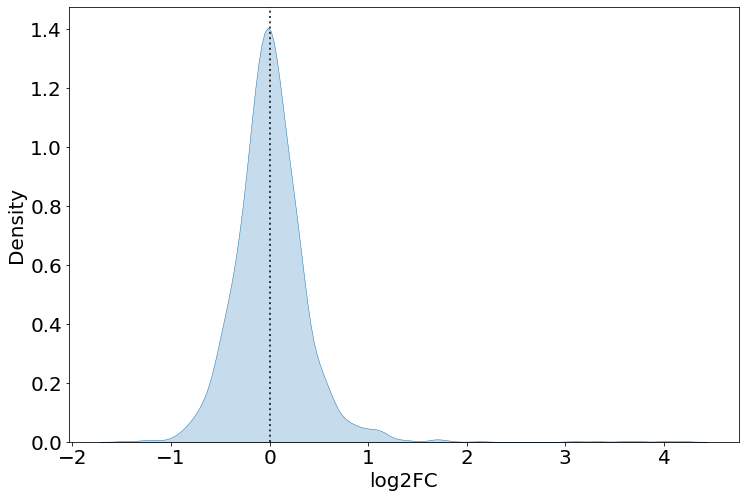

In [13]:
# histogram of log2FC
g = seaborn.kdeplot(data=correlations_df['log2FC'], fill=True, palette="tab10", alpha=1/4, linewidth=1/2)
matplotlib.pyplot.axvline(x=0, lw=2, alpha=3/4, color='black', ls=':')
matplotlib.pyplot.show()

In [14]:
correlations_df[correlations_df['corrected P value'] < 0.05]

,peak name,log2FC,P value,r value,time,corrected P value
702,X262.03859999999997,3.334741,0.000007,0.894796,4.0,0.016452
786,X276.05410000000001,3.602262,0.000027,0.868395,4.0,0.033006


In [15]:
print(correlations_df[correlations_df['P value'] < 0.05].shape)

(33, 6)


# 4. plot heatmap

In [16]:
dose_responders = list(set(correlations_df[correlations_df['P value'] < 0.05]['peak name'].to_list()))
print(len(dose_responders))
print(dose_responders[:20])

30
['X312.17011000000002', 'X307.15787999999998', 'X327.18209000000002', 'X276.05410000000001', 'X226.08796000000001', 'X134.89306999999999', 'X884.55427999999995', 'X417.21940999999998', 'X681.29566', 'X262.03859999999997', 'X378.2398', 'X233.15271000000001', 'X265.01882999999998', 'X186.04378_2', 'X325.18266', 'X480.30793', 'X276.05387000000002', 'X321.17365999999998', 'X146.08017000000001', 'X132.02816000000001']


In [17]:
chunk = ['Patient', 'Time point', 'Treatment']
for element in dose_responders:
    chunk.append(element)
print(chunk)

sub = df[chunk]
sub.head()

['Patient', 'Time point', 'Treatment', 'X312.17011000000002', 'X307.15787999999998', 'X327.18209000000002', 'X276.05410000000001', 'X226.08796000000001', 'X134.89306999999999', 'X884.55427999999995', 'X417.21940999999998', 'X681.29566', 'X262.03859999999997', 'X378.2398', 'X233.15271000000001', 'X265.01882999999998', 'X186.04378_2', 'X325.18266', 'X480.30793', 'X276.05387000000002', 'X321.17365999999998', 'X146.08017000000001', 'X132.02816000000001', 'X265.14596', 'X317.95058999999998', 'X266.14935000000003', 'X883.51959999999997', 'X326.18597', 'X311.16694000000001', 'X315.00004999999999', 'X323.16978', 'X175.02331000000001', 'X322.17590000000001']


,Patient,Time point,Treatment,X312.17011000000002,X307.15787999999998,X327.18209000000002,X276.05410000000001,X226.08796000000001,X134.89306999999999,X884.55427999999995,...,X265.14596,X317.95058999999998,X266.14935000000003,X883.51959999999997,X326.18597,X311.16694000000001,X315.00004999999999,X323.16978,X175.02331000000001,X322.17590000000001
0,1,4,1,0.028931,0.189554,-0.406985,0.000000,0.446738,-0.096472,-0.325314,...,0.176378,-0.143830,0.543518,-0.638859,0.060477,0.072045,-0.268076,-0.581110,0.780651,-0.320810
1,1,4,10,-0.463292,0.697337,-0.421410,3.612751,0.535608,-0.229085,0.498838,...,0.176378,0.127599,0.221403,0.803896,0.011189,-0.178665,0.056365,-0.589277,1.246358,0.291866
2,1,4,100,-0.073117,0.148251,-0.720142,3.856676,-0.371916,-0.113922,0.673213,...,0.406773,0.151610,0.503905,0.666974,-0.072966,-0.081331,0.262955,-0.083669,-0.691268,-0.829497
3,1,24,1,-0.254539,-0.380689,0.307844,2.012899,0.798269,-0.566094,-0.683905,...,-0.120042,-0.042820,-0.144371,-0.290270,0.000000,0.308495,1.122166,0.329304,0.835204,0.295876
4,1,24,10,0.016387,0.427173,0.340268,4.534446,-0.168011,-0.237316,-0.423702,...,-0.120042,0.149674,-0.326321,0.201630,0.040750,0.308495,1.092993,1.038510,2.374858,1.214292


In [19]:
heatmap_data = {}
for peak_name in sub.columns[3:]:
    print(peak_name)
    heatmap_data[peak_name] = []
    for time_point in time_points:
        for treatment in treatments:
            box = sub[(sub['Time point'] == time_point) & (sub['Treatment'] == treatment)][peak_name].to_list()
            v = numpy.median(box)
            heatmap_data[peak_name].append(v)
            print(peak_name, time_point, treatment, box)

X312.17011000000002
X312.17011000000002 4 1 [0.0289310276680172, 1.0595433975979454, 0.507405745315701, 0.7171016192115758, 0.2668060860706607]
X312.17011000000002 4 10 [-0.4632918270141815, 1.229235194898232, -0.3336175890912596, 0.3966180582545018, 0.6533367505465222]
X312.17011000000002 4 100 [-0.0731174903667444, 1.0595433975979454, -0.3634123324929543, 0.7701744417122338, 0.960971449889124]
X312.17011000000002 24 1 [-0.2545388708389264, 0.2415066421195018, -0.3704893136777976, 0.3981110708664683, 0.0889624412775802]
X312.17011000000002 24 10 [0.0163869269070211, -0.0615126496075273, -0.0243651152939161, -0.4016862272652481, -0.0700164195858619]
X312.17011000000002 24 100 [-0.3973289636948287, -0.0867770225926989, -0.6787000244547485, -0.4720410015089005]
X307.15787999999998
X307.15787999999998 4 1 [0.1895539604240355, -0.3123738102488875, -1.5168808904828222, -0.9306478388762917, -0.2815548159269561]
X307.15787999999998 4 10 [0.6973365867267329, 0.5625868190881818, -0.166699428517

In [25]:
hd = pandas.DataFrame.from_dict(heatmap_data).transpose().sort_index()
hd

,0,1,2,3,4,5
X132.02816000000001,0.283395,0.245920,-0.849565,0.456128,0.468093,0.232689
X134.89306999999999,-0.096472,-0.108615,-0.113922,-0.385673,-0.083827,0.651467
X146.08017000000001,-0.237290,-0.435494,-0.787092,0.918449,0.492650,0.212386
X175.02331000000001,-0.241338,-0.199948,-0.691268,0.835204,1.390482,2.292029
X186.04378_2,-0.088141,-0.312919,-0.436242,0.734115,-0.013875,0.032065
X226.08796000000001,-0.187492,-0.176086,-0.945898,0.286836,-0.168011,-0.335214
X233.15271000000001,-0.069551,-0.040058,0.577533,-0.230810,0.164508,0.155675
X262.03859999999997,-0.193273,1.578986,3.753142,0.193273,1.829501,5.224125
X265.01882999999998,-0.151795,-0.029470,0.119494,0.000000,0.057088,-0.046640
X265.14596,0.254818,-0.201383,0.406773,-0.049153,-0.295214,-0.338560


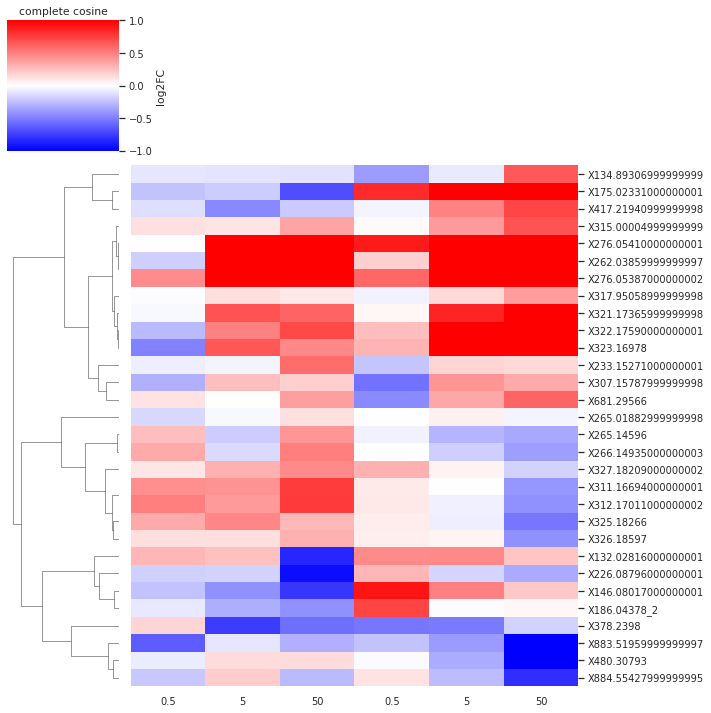

In [27]:
linkage_method = 'complete'
distance_metric = 'cosine'

seaborn.set(font_scale=0.9)
seaborn.clustermap(hd, cmap='bwr', col_cluster=False, vmin=-1, vmax=1, method=linkage_method, metric=distance_metric, yticklabels=1, xticklabels = ['0.5', '5', '50', '0.5', '5', '50'], cbar_kws={'label':'log2FC'})

matplotlib.pyplot.title('{} {}'.format(linkage_method, distance_metric))
matplotlib.pyplot.tight_layout()


In [ ]:
# generate table for annotation